<a href="https://colab.research.google.com/github/priyanka-sidhuraj/127/blob/main/113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("/content/112.csv")
fig = px.scatter(df, y="quant_saved", color="rem_any")
fig.show()

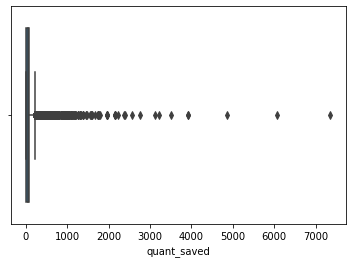

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print("Q1 -"+str({q1}))
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame


Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [ ]:
#Mean, median and mode of savings
import statistics
import plotly.figure_factory as ff

new_df = df[df["quant_saved"] < upper_whisker]
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.20051938981879
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.86687191728863


In [ ]:
import random
import plotly.figure_factory as ff
import csv
import statistics



sampling_mean_list = []

for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)

fig.show()

In [ ]:
z_score = (statistics.mean(sampling_mean_list) - statistics.mean(all_savings)) / statistics.stdev(all_savings)
print(f"Z-Score is - {z_score}")

Z-Score is - 0.7884941833184501


With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around 0.8; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there's still no significant impact.
